# Exploração de Dados Projeto Final

### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

### Importando DATASETs

#### Lendo DATASET

##### Criando um dicionário(features_types) para alterar o tipo do dtype de float64 para float16

In [2]:
features = pd.read_csv('features_dictionary.csv')

In [3]:
features = features.query('Dtype_Ajustado == "int16" or Dtype_Ajustado == "float16"')

In [4]:
features_types = dict(list(features[['Column','Dtype_Ajustado']].values))

##### DataFrame principal

In [5]:
df = pd.read_csv('estaticos_market.csv', dtype= features_types, error_bad_lines=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), float16(133), float64(11), int16(2), object(27)
memory usage: 209.4+ MB


In [7]:
df.shape

(462298, 182)

In [8]:
df.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.75,93.25,19.171875,26.0,26.0,27.0,0.0,-3.703125,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,6.512329,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,True,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,3.200000,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


##### DataFrames auxiliares

In [9]:
df1 = pd.read_csv('estaticos_portfolio1.csv', usecols=['id'])
df2 = pd.read_csv('estaticos_portfolio2.csv', usecols=['id'])
df3 = pd.read_csv('estaticos_portfolio3.csv', usecols=['id'])

In [10]:
df1.head(1)

,id
0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...


In [11]:
df2.head(1)

,id
0,09e95c1a84049001d086470a8f320a19b076f955a89122...


In [12]:
df3.head(1)

,id
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...


In [13]:
df.columns

Index(['Unnamed: 0', 'id', 'fl_matriz', 'de_natureza_juridica', 'sg_uf',
       'natureza_juridica_macro', 'de_ramo', 'setor', 'idade_empresa_anos',
       'idade_emp_cat',
       ...
       'media_meses_servicos', 'max_meses_servicos', 'min_meses_servicos',
       'qt_funcionarios', 'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais'],
      dtype='object', length=182)

#### Analise de colunas nulas

##### As colunas com todos os dados nulos não tem nenhuma relevância para a análise

In [14]:
colunas_nulas = df.isna().sum()
colunas_nulas = colunas_nulas[colunas_nulas.isin([df.shape[0]])]
lista_colunas_nulas = list(colunas_nulas.index)
qtd_lista_colunas_nulas = len(list(colunas_nulas.index))
print('Existem', qtd_lista_colunas_nulas, 'São elas', lista_colunas_nulas)

Existem 5 São elas ['qt_alteracao_socio_total', 'qt_alteracao_socio_90d', 'qt_alteracao_socio_180d', 'qt_alteracao_socio_365d', 'grau_instrucao_macro_desconhecido']


In [15]:
# Eliminando as colunas com todas as observações nulas
df.drop(columns=lista_colunas_nulas, inplace=True)
print('O novo shape é', df.shape)

O novo shape é (462298, 177)


##### As colunas com mais de 50% dos dados nulos não tem muita relevância para a análise, para chegar no número de 50% alem da quantidade de nulos foi levado em consideração a relevância da coluna para a solução.

In [16]:
colunas_nulas_perc = (df.isna().sum()/df.shape[0]*100) > 50.0 
colunas_nulas_perc = colunas_nulas_perc[colunas_nulas_perc.isin([True])]
len(list(colunas_nulas_perc.index))
lista_colunas_nulas_perc = list(colunas_nulas_perc.index)
qtd_lista_colunas_nulas_perc = len(list(colunas_nulas_perc.index))
print('Existem', qtd_lista_colunas_nulas_perc, 'São elas', lista_colunas_nulas_perc)

Existem 126 São elas ['vl_total_tancagem', 'vl_total_veiculos_antt', 'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art', 'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo', 'vl_potenc_cons_oleo_gas', 'de_indicador_telefone', 'vl_frota', 'qt_socios_st_suspensa', 'qt_socios_masculino', 'qt_socios_feminino', 'qt_socios_pep', 'qt_socios_pj_ativos', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos', 'vl_idade_media_socios_pj', 'vl_idade_maxima_socios_pj', 'vl_idade_minima_socios_pj', 'qt_coligados', 'qt_socios_coligados', 'qt_coligados_matriz', 'qt_coligados_ativo', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa', 'qt_coligados_nula', 'idade_media_coligadas', 'idade_maxima_coligadas', 'idade_minima_coligadas', 'coligada_mais_nova_ativa', 'coligada_mais_antiga_ativa', 'idade_media_coligadas_ativas', 'coligada_mais_nova_baixada', 'coligada_mais_antiga_baixada', 'idade_media_coligadas_baixadas', 'qt_colig

In [17]:
# Eliminando as colunas com observações nulas em mais de 50%
df.drop(columns=lista_colunas_nulas_perc, inplace=True)
print('O novo shape é', df.shape)

O novo shape é (462298, 51)


##### Verificar as colunas nulas restantes, e analisar a relevância

In [18]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

qt_socios_st_regular                     0.335102
idade_minima_socios                      0.327931
idade_maxima_socios                      0.327931
idade_media_socios                       0.327931
empsetorcensitariofaixarendapopulacao    0.311118
qt_socios_pj                             0.248954
qt_socios_pf                             0.248954
qt_socios                                0.248954
fl_optante_simei                         0.178917
fl_optante_simples                       0.178917
nm_micro_regiao                          0.126970
nm_meso_regiao                           0.126970
nu_meses_rescencia                       0.097937
de_faixa_faturamento_estimado            0.059514
vl_faturamento_estimado_grupo_aux        0.059514
de_faixa_faturamento_estimado_grupo      0.059514
vl_faturamento_estimado_aux              0.059514
de_saude_rescencia                       0.032124
de_saude_tributaria                      0.032124
de_nivel_atividade                       0.024158


##### Analise das colunas restantes, para verificar a possibilidade de eliminar mais alguma coluna irrelevante para a solução.

In [19]:
colunas_drop = ['Unnamed: 0','fl_email','fl_telefone','qt_socios_st_regular','qt_socios_pj',
                'qt_socios_pf','fl_simples_irregular','fl_optante_simei','fl_optante_simples']

**Unnamed**: 0: numeração das observações

**fl_email**: boolean value, true if the cnpj has an email registered at the IRF database. 

**fl_telefone**: boolean value, true if the company has a phone number registered in IRS database.

**qt_socios_st_regular**: integer value, quantity of partners with regular situation under IRS - Receita Federal

**qt_socios_pj**:  integer value, quantity of partners/shareholders of the cnpj that are companies

**qt_socios_pf**: integer value, quantity of partners/shareholders of the cnpj that are persons

**fl_simples_irregular**: boolean, true if the company is taxed under the SIMPLES regime and has a impeditive CNAE (economic activities that are not allowed to be taxed according to the simples regime) revenue above the limit of the regime.

**fl_optante_simei**: boolean, true if the company is taxed as an MEI - Individual Micro Entrepreneur (Micro Empreendedor Individual)

**fl_optante_simples**: boolean, true if the company is taxed according to SIMPLES regime

In [20]:
# Eliminando colunas julgadas irrelevantes
df.drop(columns=colunas_drop, inplace=True)
print('O novo shape é', df.shape)

O novo shape é (462298, 42)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     462298 non-null  object 
 1   fl_matriz                              462298 non-null  bool   
 2   de_natureza_juridica                   462298 non-null  object 
 3   sg_uf                                  462298 non-null  object 
 4   natureza_juridica_macro                462298 non-null  object 
 5   de_ramo                                462298 non-null  object 
 6   setor                                  460371 non-null  object 
 7   idade_empresa_anos                     462298 non-null  float64
 8   idade_emp_cat                          462298 non-null  object 
 9   fl_me                                  462298 non-null  bool   
 10  fl_sa                                  462298 non-null  

##### Criando um novo dataset, substituindo a media nas colunas numéricas e dropando os dados nulos da demais colunas para análise

In [22]:
#df_nao_nulos = df.fillna(df.mean())

In [23]:
#df_nao_nulos = df.dropna()
#print('O novo shape é', df_nao_nulos.shape)

In [24]:
#Dados para teste de validação do cluster
df_nao_nulos = df[['id','idade_empresa_anos','qt_filiais','fl_me','fl_sa','fl_epp','fl_mei',
                   'fl_ltda','de_natureza_juridica','sg_uf','de_ramo','setor','nm_divisao',
                   'nm_segmento','de_nivel_atividade','nm_meso_regiao','nm_micro_regiao',
                   'de_faixa_faturamento_estimado','de_faixa_faturamento_estimado_grupo']]

In [25]:
df_nao_nulos.dropna(inplace=True)

c:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Exploração de Dados

##### Ajustando todos os dados para numéricos

In [26]:
# Selecionando as colunas tipo boleanas
colunas_bool = list(df_nao_nulos.select_dtypes(include='bool').columns)

In [27]:
df_nao_nulos = pd.get_dummies(df_nao_nulos, columns=colunas_bool)

In [28]:
# Para as demais colunas vamos usar o LabelEncoder
colunas_object = list(df_nao_nulos.select_dtypes(include='object').columns)
#colunas_object.remove('id')
encoder = LabelEncoder()
for label in colunas_object:
    label_coluna = 'cod_' + label
    df_nao_nulos[label_coluna] = encoder.fit_transform(df_nao_nulos[label])

In [51]:
df_nao_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379194 entries, 0 to 462295
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   id                                       379194 non-null  object 
 1   idade_empresa_anos                       379194 non-null  float64
 2   qt_filiais                               379194 non-null  int16  
 3   de_natureza_juridica                     379194 non-null  object 
 4   sg_uf                                    379194 non-null  object 
 5   de_ramo                                  379194 non-null  object 
 6   setor                                    379194 non-null  object 
 7   nm_divisao                               379194 non-null  object 
 8   nm_segmento                              379194 non-null  object 
 9   de_nivel_atividade                       379194 non-null  object 
 10  nm_meso_regiao                  

In [52]:
df_nao_nulos.describe()

,idade_empresa_anos,qt_filiais,fl_me_False,fl_me_True,fl_sa_False,fl_sa_True,fl_epp_False,fl_mei_False,fl_mei_True,fl_ltda_False,...,cod_de_ramo,cod_setor,cod_nm_divisao,cod_nm_segmento,cod_de_nivel_atividade,cod_nm_meso_regiao,cod_nm_micro_regiao,cod_de_faixa_faturamento_estimado,cod_de_faixa_faturamento_estimado_grupo,portfolio
count,379194.000000,379194.000000,379194.000000,379194.000000,379194.000000,379194.000000,379194.0,379194.000000,379194.000000,379194.000000,...,379194.000000,379194.000000,379194.000000,379194.000000,379194.000000,379194.000000,379194.000000,379194.000000,379194.000000,379194.000000
mean,10.410149,30.902090,0.997223,0.002777,0.979876,0.020124,1.0,0.695491,0.304509,0.997313,...,12.341931,2.400874,34.517951,10.226894,1.124359,6.936262,36.927507,7.404371,7.134419,0.005752
std,9.502653,486.881776,0.052624,0.052624,0.140426,0.140426,0.0,0.460200,0.460200,0.051769,...,9.274739,1.424376,22.107361,4.341453,0.919683,4.451862,21.503120,3.797933,3.847425,0.110218
min,0.035616,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.306849,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,1.000000,...,5.000000,1.000000,28.000000,9.000000,0.000000,3.000000,20.000000,2.000000,2.000000,0.000000
50%,7.128767,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.000000,1.000000,...,5.000000,2.000000,30.000000,9.000000,1.000000,6.000000,43.000000,10.000000,10.000000,0.000000
75%,15.065753,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,...,21.000000,4.000000,36.000000,13.000000,2.000000,10.000000,49.000000,10.000000,10.000000,0.000000
max,106.432877,9647.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,31.000000,4.000000,86.000000,20.000000,3.000000,18.000000,72.000000,11.000000,10.000000,3.000000


### Analisando os Portfólios

In [32]:
# Verificando tamando dos clientes
print('O cliente 1 tem um portfólio com:', df1.shape[0], 'clientes')
print('O cliente 2 tem um portfólio com:', df2.shape[0], 'clientes')
print('O cliente 3 tem um portfólio com:', df3.shape[0], 'clientes')

O cliente 1 tem um portfólio com: 555 clientes
O cliente 2 tem um portfólio com: 566 clientes
O cliente 3 tem um portfólio com: 265 clientes


In [33]:
# Adicionando identificação dos portifólios
df1['portfolio'] = 1
df2['portfolio'] = 2
df3['portfolio'] = 3

In [34]:
# Juntando os clientes
df_clientes = df1.append(df2).append(df3)

In [37]:
# Identificando os clientes na base de mercado
df = df.join(df_clientes.set_index('id'), on='id')
df_nao_nulos = df_nao_nulos.join(df_clientes.set_index('id'), on='id')

In [38]:
# Preenchendo os demais portifolios do mercado como 0
df['portfolio'].fillna(0, inplace=True)
df_nao_nulos['portfolio'].fillna(0, inplace=True)
print('\n*** Base original***')
print(df['portfolio'].value_counts())
print('\n*** Base Após Tratamento***')
print(df_nao_nulos['portfolio'].value_counts())


*** Base original***
0.0    461020
2.0       566
1.0       555
3.0       265
Name: portfolio, dtype: int64

*** Base Após Tratamento***
0.0    377991
2.0       496
1.0       466
3.0       241
Name: portfolio, dtype: int64


In [39]:
# Separando os portifolios para Analise
df_me = df.query('portfolio == 0')
df_p1 = df.query('portfolio == 1')
df_p2 = df.query('portfolio == 2')
df_p3 = df.query('portfolio == 3')

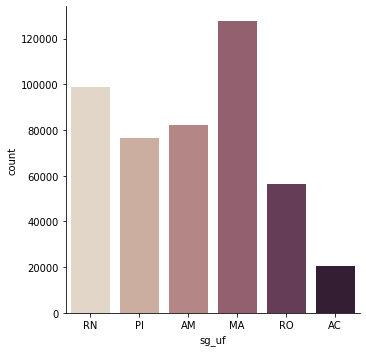

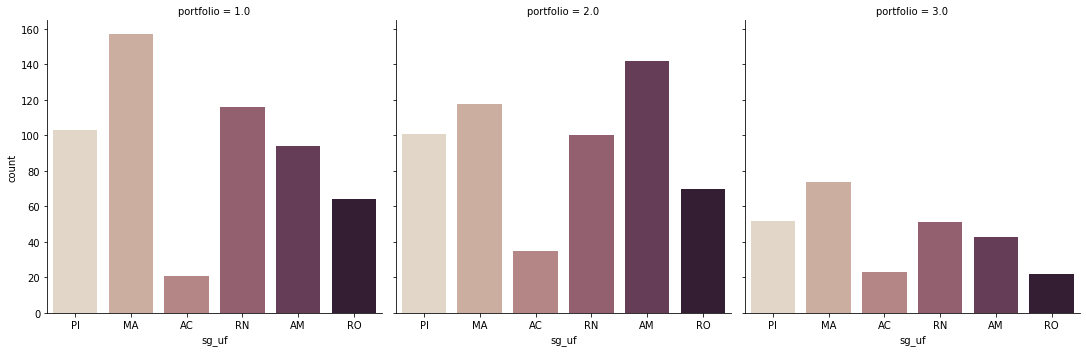

In [40]:
df_uf = df[['sg_uf','portfolio']]

sns.catplot(x="sg_uf", 
            kind="count", 
            palette="ch:.25", 
            data=df_uf.query('portfolio in (0,1,2,3)'));

sns.catplot(x="sg_uf", 
            kind="count", 
            palette="ch:.25", 
            data=df_uf.query('portfolio in (1,2,3)'),
            col="portfolio");

In [41]:
# Analisando a faixa de faturamento dos portfólios
fat1 = df_p1['de_faixa_faturamento_estimado'].value_counts().index[0]
fat2 = df_p2['de_faixa_faturamento_estimado'].value_counts().index[0]
fat3 = df_p3['de_faixa_faturamento_estimado'].value_counts().index[0]
print('Os clientes do portfólio 1 tem uma faixa de faturamento', fat1)
print('Os clientes do portfólio 2 tem uma faixa de faturamento', fat2)
print('Os clientes do portfólio 3 tem uma faixa de faturamento', fat3)


Os clientes do portfólio 1 tem uma faixa de faturamento DE R$ 81.000,01 A R$ 360.000,00
Os clientes do portfólio 2 tem uma faixa de faturamento DE R$ 10.000.000,01 A R$ 30.000.000,00
Os clientes do portfólio 3 tem uma faixa de faturamento DE R$ 30.000.000,01 A R$ 100.000.000,00


In [81]:
# Analisando o ramo dos portfólios
ramo1 = df_p1['de_ramo'].value_counts().index[0]
ramo2 = df_p2['de_ramo'].value_counts().index[0]
ramo3 = df_p3['de_ramo'].value_counts().index[0]
print('Os clientes do portfólio 1 atuam no ramo', ramo1)
print('Os clientes do portfólio 2 atuam no ramo', ramo2)
print('Os clientes do portfólio 3 atuam no ramo', ramo3)

Os clientes do portfólio 1 atuam no ramo COMERCIO VAREJISTA
Os clientes do portfólio 2 atuam no ramo ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL
Os clientes do portfólio 3 atuam no ramo ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL


In [85]:
# Analisando o setor dos portfólios
setor1 = df_p1['setor'].value_counts().index[0]
setor2 = df_p2['setor'].value_counts().index[0]
setor3 = df_p3['setor'].value_counts().index[0]
print('Os clientes do portfólio 1 atuam no setor', setor1)
print('Os clientes do portfólio 2 atuam no setor', setor2)
print('Os clientes do portfólio 3 atuam no setor', setor3)

Os clientes do portfólio 1 atuam no setor COMERCIO
Os clientes do portfólio 2 atuam no setor SERVIÇO
Os clientes do portfólio 3 atuam no setor SERVIÇO


### Modelo Machine Learning

In [53]:
# Selecionando apenas as colunas numéricas
colunas_number = list(df_nao_nulos.select_dtypes(include='number').columns)
X = df_nao_nulos[colunas_number]

In [92]:
kmeans = KMeans(n_clusters = 8, n_init=30, algorithm='full')
kmeans.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=30, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
kmeans.cluster_centers_

array([[1.04483759e+01, 3.16177588e+01, 9.97246705e-01, 2.75329525e-03,
        9.80046521e-01, 1.99534788e-02, 1.00000000e+00, 6.95745051e-01,
        3.04254949e-01, 9.97215058e-01, 2.78494232e-03, 1.90004798e+05,
        2.48183142e+01, 2.37144168e+00, 1.23752631e+01, 2.40463946e+00,
        3.45412678e+01, 1.02469263e+01, 1.12661993e+00, 6.94451477e+00,
        3.69083184e+01, 7.41209235e+00, 7.14438185e+00, 5.66482586e-03],
       [1.03771844e+01, 2.89494307e+01, 9.96990774e-01, 3.00922618e-03,
        9.79673828e-01, 2.03261715e-02, 1.00000000e+00, 6.94488114e-01,
        3.05511886e-01, 9.97205151e-01, 2.79484859e-03, 3.16145188e+05,
        2.48373509e+01, 2.37210392e+00, 1.23270687e+01, 2.40009210e+00,
        3.44785781e+01, 1.02129405e+01, 1.12251282e+00, 6.92926334e+00,
        3.69106839e+01, 7.39136614e+00, 7.12136154e+00, 6.16931066e-03],
       [1.04047908e+01, 3.21276980e+01, 9.97430117e-01, 2.56988349e-03,
        9.79906034e-01, 2.00939663e-02, 1.00000000e+00, 6.9623

In [56]:
distance = kmeans.fit_transform(X)
distance

array([[ 69637.20919629, 183096.83901727,  56525.21312709],
       [171987.20291479,  80746.8532505 ,  45824.84344711],
       [205941.2038801 ,  46792.87900699,  79778.8343737 ],
       ...,
       [211692.19789916,  41041.85618409,  85529.81849557],
       [166171.20509688,  86562.8553937 ,  40008.85630629],
       [ 86045.21512069, 166688.8442349 ,  40117.24045947]])

In [57]:
df_nao_nulos.shape

(379194, 36)

In [93]:
# Adicionando as classe no df
labels = kmeans.labels_
df_nao_nulos['kmeans'] = labels

1 4541539042722704.0
2 1135406453464018.0
3 504679823009149.75
4 283938099876738.44
5 181764989026177.78
6 126269960477607.56
7 92821459865636.98
8 71100458018557.33
9 56169053823430.77
10 45565312439524.67


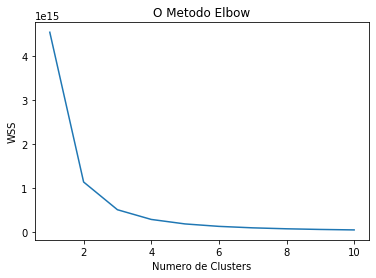

In [60]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    print (i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

O gráfico mostra o somatório da variância dos dados em relação ao número de clusters para conseguir verificar até que ponto com o aumento do número de clusters não existe ganho.

Observe que a partir do número de 2 clusters as distâncias dos erros quadráticos praticamente se estabiliza.

A partir desse ponto que não existe uma discrepância tão significativa em termos de variância.

In [61]:
df_nao_nulos.head(2)

,id,idade_empresa_anos,qt_filiais,de_natureza_juridica,sg_uf,de_ramo,setor,nm_divisao,nm_segmento,de_nivel_atividade,...,cod_setor,cod_nm_divisao,cod_nm_segmento,cod_de_nivel_atividade,cod_nm_meso_regiao,cod_nm_micro_regiao,cod_de_faixa_faturamento_estimado,cod_de_faixa_faturamento_estimado_grupo,portfolio,kmeans
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,14.457534,0,SOCIEDADE EMPRESARIA LIMITADA,RN,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,ALTA,...,2,32,10,0,6,48,2,2,0.0,2
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1.463014,0,EMPRESARIO INDIVIDUAL,PI,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,BAIXA,...,4,3,3,1,4,69,10,10,0.0,2


In [94]:
df_nao_nulos.query('portfolio == 2')['kmeans'].value_counts()

1    77
5    67
7    66
0    60
6    58
4    58
2    56
3    54
Name: kmeans, dtype: int64

In [95]:
df_nao_nulos['kmeans'].value_counts()

1    47903
2    47684
5    47656
4    47467
3    47300
7    47170
6    47030
0    46984
Name: kmeans, dtype: int64